# Problem 1: Python & Data Exploration (20 points)

In [51]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value (iris species) is the last column
X = iris[:,0:-1] # features are the other columns

### 1.1

In [53]:
X.shape

(148, 4)

Features=4, data points = 148

### 1.2

(array([  9.,  20.,  16.,  27.,  16.,  25.,  17.,  10.,   2.,   6.]),
 array([ 4.3265579 ,  4.68918546,  5.05181302,  5.41444058,  5.77706814,
         6.1396957 ,  6.50232326,  6.86495082,  7.22757838,  7.59020594,
         7.9528335 ]),
 <a list of 10 Patch objects>)

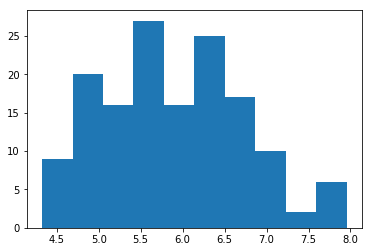

In [54]:
plt.hist(X[:, 0]) #Feature 1 Histogram

(array([  1.,  10.,  17.,  28.,  43.,  23.,  12.,   9.,   3.,   2.]),
 array([ 2.0020454 ,  2.24764816,  2.49325092,  2.73885368,  2.98445644,
         3.2300592 ,  3.47566196,  3.72126472,  3.96686748,  4.21247024,
         4.458073  ]),
 <a list of 10 Patch objects>)

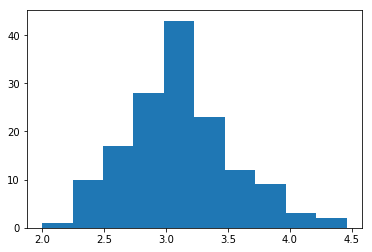

In [55]:
plt.hist(X[:, 1]) #Feature 2 Histogram

(array([ 36.,  13.,   0.,   3.,   7.,  25.,  26.,  21.,  11.,   6.]),
 array([ 1.0238316 ,  1.61492121,  2.20601082,  2.79710043,  3.38819004,
         3.97927965,  4.57036926,  5.16145887,  5.75254848,  6.34363809,
         6.9347277 ]),
 <a list of 10 Patch objects>)

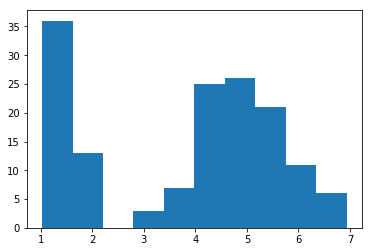

In [56]:
plt.hist(X[:, 2]) #Feature 3 Histogram

(array([ 40.,   8.,   1.,   7.,  17.,  23.,   9.,  20.,  14.,   9.]),
 array([ 0.12509037,  0.37029368,  0.615497  ,  0.86070031,  1.10590362,
         1.35110693,  1.59631025,  1.84151356,  2.08671687,  2.33192019,
         2.5771235 ]),
 <a list of 10 Patch objects>)

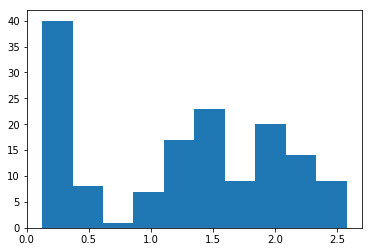

In [57]:
plt.hist(X[:, 3]) #Feature 4 Histogram

### 1.3

In [58]:
np.mean(X, axis=0) #Mean

array([ 5.90010376,  3.09893092,  3.81955484,  1.25255548])

In [59]:
np.std(X, axis=0) #Standard Deviation

array([ 0.83340207,  0.43629184,  1.75405711,  0.75877246])

### 1.4

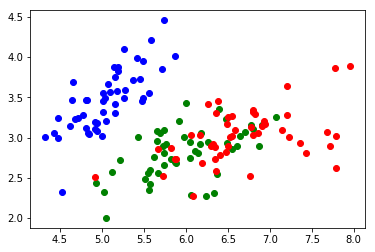

In [60]:
#Features (1,2)
colors = ['b','g','r']
for c in np.unique(Y):
    plt.plot(X[:, 0][Y==c], X[:, 1][Y==c], 'o', color=colors[int(c)])

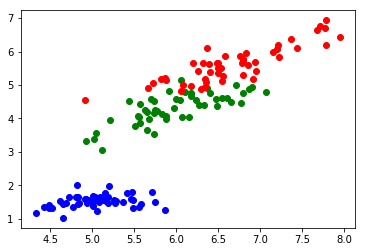

In [61]:
#Features (1,3)
colors = ['b','g','r']
for c in np.unique(Y):
    plt.plot(X[:, 0][Y==c], X[:, 2][Y==c], 'o', color=colors[int(c)])

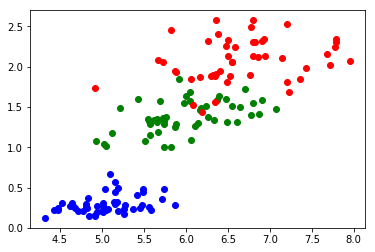

In [62]:
#Features (1,4)
colors = ['b','g','r']
for c in np.unique(Y):
    plt.plot(X[:, 0][Y==c], X[:, 3][Y==c], 'o', color=colors[int(c)])

# Problem 2: k-nearest-neighbor predictions

In [4]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data
Y = iris[:, -1]
X = iris[:,0:2]

import mltools as ml
np.random.seed(0)
X,Y = ml.shuffleData(X,Y);

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);
knn = ml.knn.knnClassify()

### 2.1

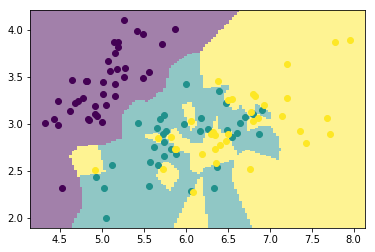

In [6]:
knn.train(Xtr, Ytr, 1) #K=1
YvHat = knn.predict(Xva)
ml.plotClassify2D(knn, Xtr, Ytr)

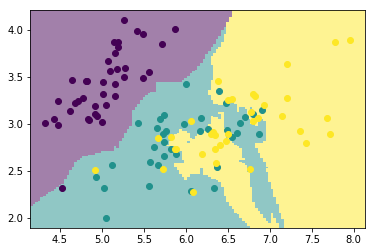

In [71]:
knn.train(Xtr, Ytr, 5) #K=5
YvHat = knn.predict(Xva)
ml.plotClassify2D(knn, Xtr, Ytr)

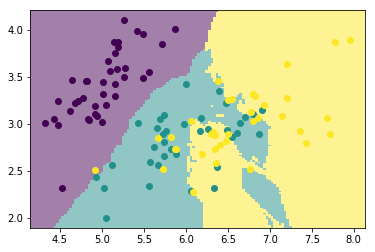

In [72]:
knn.train(Xtr, Ytr, 10) #K=10
YvHat = knn.predict(Xva)
ml.plotClassify2D(knn, Xtr, Ytr)

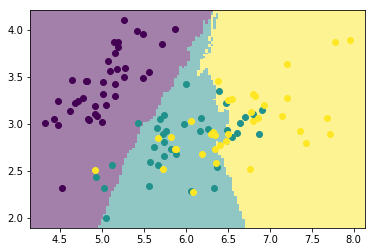

In [73]:
knn.train(Xtr, Ytr, 50) #K=50
YvHat = knn.predict(Xva)
ml.plotClassify2D(knn, Xtr, Ytr)

### 2.2

In [10]:
K=[1,2,5,10,50,100,200];
errTrain = [None]*len(K)
errVal = [None]*len(K)
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k)
    Yhattr = learner.predict(Xtr)
    count_t = 0
    for a,b in zip(Yhattr, Ytr):
        if a!=b:
            count_t += 1;
    errTrain[i] = float(count_t)/len(Ytr)
    
    Yhatval = learner.predict(Xva)
    count_v = 0
    for a,b in zip(Yhatval, Yva):
        if a != b:
            count_v += 1;
    errVal[i] = (float(count_v)/len(Yva));
    
    print("Training error for K=",k," : ", errTrain[i])
    print("Validation error for K=",k," : ", errVal[i])

Training error for K= 1  :  0.0
Validation error for K= 1  :  0.2972972972972973
Training error for K= 2  :  0.11711711711711711
Validation error for K= 2  :  0.2972972972972973
Training error for K= 5  :  0.13513513513513514
Validation error for K= 5  :  0.2702702702702703
Training error for K= 10  :  0.18018018018018017
Validation error for K= 10  :  0.3783783783783784
Training error for K= 50  :  0.26126126126126126
Validation error for K= 50  :  0.13513513513513514
Training error for K= 100  :  0.4144144144144144
Validation error for K= 100  :  0.32432432432432434
Training error for K= 200  :  0.6486486486486487
Validation error for K= 200  :  0.7297297297297297


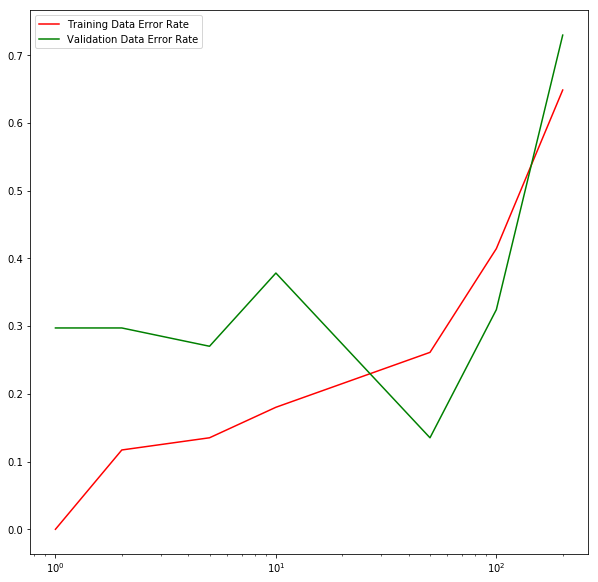

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.semilogx(K, errTrain, "red", label = "Training Data Error")
ax.semilogx(K, errVal, "green", label = "Validation Data Error")
ax.legend()
plt.show()

#### The best choice would be K = 50 as the validation error is the lowest at 0.135

## 2.3

In [11]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data
Y = iris[:, -1]
X = iris[:, 0:-1]

import mltools as ml
np.random.seed(0)
X,Y = ml.shuffleData(X,Y);

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);
knn = ml.knn.knnClassify()

K=[1,2,5,10,50,100,200];
errTrain = [None]*len(K)
errVal = [None]*len(K)
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k)
    Yhattr = learner.predict(Xtr)
    count_t = 0
    for a,b in zip(Yhattr, Ytr):
        if a!=b:
            count_t += 1;
    errTrain[i] = float(count_t)/len(Ytr)
    
    Yhatval = learner.predict(Xva)
    count_v = 0
    for a,b in zip(Yhatval, Yva):
        if a != b:
            count_v += 1;
    errVal[i] = (float(count_v)/len(Yva));
    
    print("Training error for K=",k," : ", errTrain[i])
    print("Validation error for K=",k," : ", errVal[i])

Training error for K= 1  :  0.0
Validation error for K= 1  :  0.05405405405405406
Training error for K= 2  :  0.02702702702702703
Validation error for K= 2  :  0.02702702702702703
Training error for K= 5  :  0.018018018018018018
Validation error for K= 5  :  0.02702702702702703
Training error for K= 10  :  0.018018018018018018
Validation error for K= 10  :  0.02702702702702703
Training error for K= 50  :  0.11711711711711711
Validation error for K= 50  :  0.05405405405405406
Training error for K= 100  :  0.3783783783783784
Validation error for K= 100  :  0.3783783783783784
Training error for K= 200  :  0.6486486486486487
Validation error for K= 200  :  0.7297297297297297


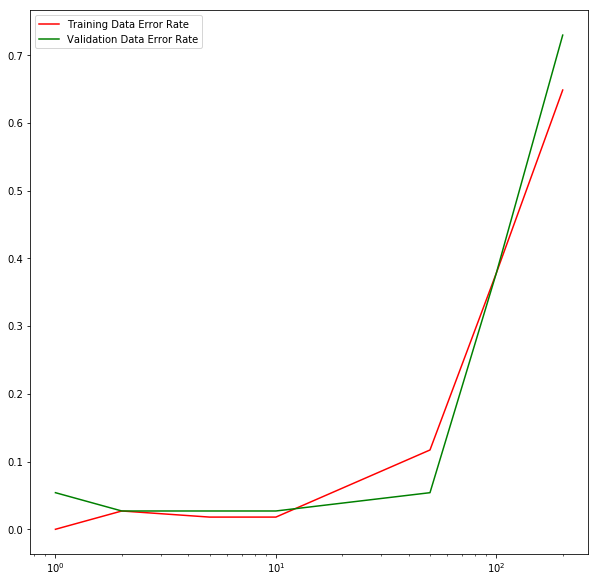

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.semilogx(K, errTrain, "red", label = "Training Data Error")
ax.semilogx(K, errVal, "green", label = "Validation Data Error")
ax.legend()
plt.show()

#### When K is 5 or 10, the validation error rate is the lowest at 0.018. Also, training error rate i the same. However, as 10 is larger than 5, k=10 is the better choice.